Importing most important python libraries:

In [1]:
import pandas as pd
import numpy as np

There are 8 different csv files regarding each year. 
<br>To make full analysis throughout 2015-2022, I am going to join each file into main dataframe using 'for in' loop. 
<br>Python codes slash marks differently so that had to be adjusted to '/' instead of '\\', along with typing raw string instead of regular one.
<br>*note: be careful of 2022 year file. Some columns have "," thousand delimiter so it can be easily mistaken by comma (fraction delimiter). I took take of this directly in csv file.

In [2]:
files = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
main_df = pd.DataFrame(pd.read_csv(r"C:/Users/Agata/Desktop/World's Happiness Report/2015.csv"))
for i in range(1, len(files)):
    data = pd.read_csv(r"C:/Users/Agata/Desktop/World's Happiness Report/"+files[i]+r".csv")
    df = pd.DataFrame(data)
    main_df = pd.concat([main_df,df],axis=0)
print(main_df)


         Country          Region  Happiness Rank  Happiness Score  \
0    Switzerland  Western Europe             1.0            7.587   
1        Iceland  Western Europe             2.0            7.561   
2        Denmark  Western Europe             3.0            7.527   
3         Norway  Western Europe             4.0            7.522   
4         Canada   North America             5.0            7.427   
..           ...             ...             ...              ...   
142      Rwanda*             NaN             NaN              NaN   
143     Zimbabwe             NaN             NaN              NaN   
144      Lebanon             NaN             NaN              NaN   
145  Afghanistan             NaN             NaN              NaN   
146           xx             NaN             NaN              NaN   

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223 

Let's see what the dataframe looks like:

In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 146
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     617 non-null    object 
 1   Region                                      315 non-null    object 
 2   Happiness Rank                              315 non-null    float64
 3   Happiness Score                             315 non-null    float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    315 non-null    float64
 6   Family                                      470 non-null    float64
 7   Health (Life Expectancy)                    315 non-null    float64
 8   Freedom                                     470 non-null    float64
 9   Trust (Government Corruption)               315 non-null    float64
 10  Generosity   

The df has 1231 rows and 51 colums. Let's see how many columns are unique:

In [4]:
main_df.shape

(1231, 56)

The df has 1231 rows and 51 colums. Let's see how many columns are unique:

In [5]:
len(main_df.columns.unique())

56

All columns are unique. However, the number of columns is high so we will focus on null values next:

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 146
Data columns (total 56 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     617 non-null    object 
 1   Region                                      315 non-null    object 
 2   Happiness Rank                              315 non-null    float64
 3   Happiness Score                             315 non-null    float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    315 non-null    float64
 6   Family                                      470 non-null    float64
 7   Health (Life Expectancy)                    315 non-null    float64
 8   Freedom                                     470 non-null    float64
 9   Trust (Government Corruption)               315 non-null    float64
 10  Generosity   

We can see that there are more null values in almost each column than non-null values. That means the columns in each file could be named differently. 
<br>For example, information about countries is split into three columns:
* Country
* Country or region
* Country name
<br> The files have between 9-20 columns. We could equalize the names manually, directly in csv files or add <b>if statements</b>:

In [7]:
correct_names = {'Economy (GDP per Capita)' : 'GDP per Capita',
'Family' : 'Social Support',
'Health (Life Expectancy)' : 'Healthy Life Expectancy',
'Freedom' : 'Freedom to Make Life Choices',
'Trust (Government Corruption)' : 'Corruption Perception',
'Happiness.Rank' : 'Happiness Rank',
'Happiness.Score' : 'Happiness Score',
'Economy..GDP.per.Capita.' : 'GDP per Capita',
'Health..Life.Expectancy.' : 'Healthy Life Expectancy',
'Trust..Government.Corruption.' : 'Corruption Perception',
'Dystopia.Residual' : 'Dystopia Residual',
'Overall rank' : 'Happiness Rank',
'Country or region' : 'Country',
'Score' : 'Happiness Score',
'GDP per capita' : 'GDP per Capita',
'Country name' : 'Country',
'Regional indicator' : 'Region',
'RANK' : 'Happiness Rank',
'Happiness score' : 'Happiness Score',
'Dystopia (1.83) + residual' : 'Dystopia Residual',
'Ladder score' : 'Happiness Score',
'Explained by: Social support' : 'Social Support',
'Explained by: Healthy life expectancy' : 'Healthy Life Expectancy',
'Explained by: Freedom to make life choices' : 'Freedom to Make Life Choices',
'Explained by: Generosity' : 'Generosity',
'Explained by: Perceptions of corruption' : 'Corruption Perception',
'Explained by: GDP per capita' : 'GDP per Capita',
'Dystopia + residual' : 'Dystopia Residual',
'Social support' : 'Social Support',
'Healthy life expectancy' : 'Healthy Life Expectancy',
'Freedom to make life choices' : 'Freedom to Make Life Choices',
'Perceptions of corruption' : 'Corruption Perception',
'Explained by: Log GDP per capita' : 'GDP per Capita'
}

In [8]:
files = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
          
main_df = pd.DataFrame(pd.read_csv(r"C:/Users/Agata/Desktop/World's Happiness Report/2015.csv"))
main_df['year'] = '2015'
main_df = main_df.rename(columns=correct_names)
#main_df = main_df.set_index(['year','Country'])
for i in range(1, len(files)):
    data = pd.read_csv(r"C:/Users/Agata/Desktop/World's Happiness Report/"+files[i]+r".csv")
    df = pd.DataFrame(data)
    df['year'] = files[i]
    df = df.rename(columns=correct_names)
    #df = df.set_index(['year','Country'])
    main_df = pd.concat([main_df,df],axis=0)
    main_df = main_df.reset_index(drop=True)
main_df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Corruption Perception,...,lowerwhisker,Logged GDP per capita,Social support_,Healthy life expectancy_,Freedom to make life choices_,Generosity_,Perceptions of corruption_,Ladder score in Dystopia,Whisker-high,Whisker-low
1226,Rwanda*,NaN,143.0,3.268,NaN,0.001,0.000,0.462,0.621,0.544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.462,3.074
1227,Zimbabwe,NaN,144.0,2.995,NaN,0.001,0.001,0.270,0.329,0.105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.110,2.880
1228,Lebanon,NaN,145.0,2.955,NaN,1.392,0.000,0.631,0.103,0.034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.049,2.862
1229,Afghanistan,NaN,146.0,2.404,NaN,0.001,0.000,0.289,0.000,0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.469,2.339
1230,xx,NaN,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         1231 non-null   object 
 1   Region                          617 non-null    object 
 2   Happiness Rank                  929 non-null    float64
 3   Happiness Score                 1230 non-null   float64
 4   Standard Error                  158 non-null    float64
 5   GDP per Capita                  1230 non-null   float64
 6   Social Support                  1230 non-null   float64
 7   Healthy Life Expectancy         1230 non-null   float64
 8   Freedom to Make Life Choices    1230 non-null   float64
 9   Corruption Perception           1229 non-null   float64
 10  Generosity                      1230 non-null   float64
 11  Dystopia Residual               918 non-null    float64
 12  year                            12

In [10]:
df = main_df.loc[:,:'year']
df = df.drop(columns='Standard Error')
df = df.drop(1230)
df['Country'] = df['Country'].str.replace('*','')
df.tail()

C:\Users\Agata\AppData\Local\Temp\ipykernel_792\4168921765.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Country'] = df['Country'].str.replace('*','')


,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Corruption Perception,Generosity,Dystopia Residual,year
1225,Botswana,NaN,142.0,3.471,1.503,0.001,0.280,0.571,0.102,0.012,0.000,2022
1226,Rwanda,NaN,143.0,3.268,0.001,0.000,0.462,0.621,0.544,0.187,0.001,2022
1227,Zimbabwe,NaN,144.0,2.995,0.001,0.001,0.270,0.329,0.105,0.106,0.001,2022
1228,Lebanon,NaN,145.0,2.955,1.392,0.000,0.631,0.103,0.034,0.082,0.000,2022
1229,Afghanistan,NaN,146.0,2.404,0.001,0.000,0.289,0.000,0.005,0.089,1.263,2022


In [11]:
rank = df[df.year.isin(['2020','2021'])]
rank['Happiness Rank'] = rank.groupby('year')['Happiness Score'].rank('dense',ascending=False)
#rank.to_csv(r'C:/Users/Agata/Desktop/test_rank.csv', index=True)
df.loc[782:1083,'Happiness Rank'] = rank['Happiness Rank']

C:\Users\Agata\AppData\Local\Temp\ipykernel_792\702779256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank['Happiness Rank'] = rank.groupby('year')['Happiness Score'].rank('dense',ascending=False)


In [12]:
df[df.year.isin(['2016'])]

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Corruption Perception,Generosity,Dystopia Residual,year
158,Denmark,Western Europe,1.0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
159,Switzerland,Western Europe,2.0,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
160,Iceland,Western Europe,3.0,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
161,Norway,Western Europe,4.0,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
162,Finland,Western Europe,5.0,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153.0,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
311,Afghanistan,Southern Asia,154.0,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
312,Togo,Sub-Saharan Africa,155.0,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016
313,Syria,Middle East and Northern Africa,156.0,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016


In [13]:
c = df.loc[158:314].Country.tolist()
r = df.loc[158:314].Region.tolist()
region = {c[i] : r[i] for i in range(len(c))}
region
df['Region'] = df.Country.map(region)
df


,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Corruption Perception,Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1225,Botswana,Sub-Saharan Africa,142.0,3.471,1.50300,0.00100,0.28000,0.57100,0.10200,0.01200,0.00000,2022
1226,Rwanda,Sub-Saharan Africa,143.0,3.268,0.00100,0.00000,0.46200,0.62100,0.54400,0.18700,0.00100,2022
1227,Zimbabwe,Sub-Saharan Africa,144.0,2.995,0.00100,0.00100,0.27000,0.32900,0.10500,0.10600,0.00100,2022
1228,Lebanon,Middle East and Northern Africa,145.0,2.955,1.39200,0.00000,0.63100,0.10300,0.03400,0.08200,0.00000,2022


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1230 non-null   object 
 1   Region                        1180 non-null   object 
 2   Happiness Rank                1230 non-null   float64
 3   Happiness Score               1230 non-null   float64
 4   GDP per Capita                1230 non-null   float64
 5   Social Support                1230 non-null   float64
 6   Healthy Life Expectancy       1230 non-null   float64
 7   Freedom to Make Life Choices  1230 non-null   float64
 8   Corruption Perception         1229 non-null   float64
 9   Generosity                    1230 non-null   float64
 10  Dystopia Residual             918 non-null    float64
 11  year                          1230 non-null   object 
dtypes: float64(9), object(3)
memory usage: 115.4+ KB


In [15]:
#df.to_csv(r'C:/Users/Agata/Desktop/test.csv', index=True)

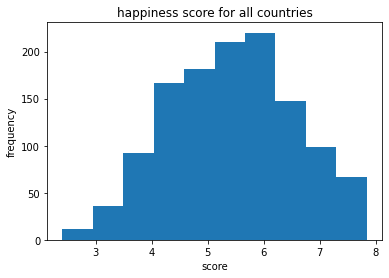

In [16]:
import matplotlib.pyplot as plt
plt.hist(df['Happiness Score'])
plt.title('happiness score for all countries')
plt.xlabel('score')
plt.ylabel('frequency')
plt.show()

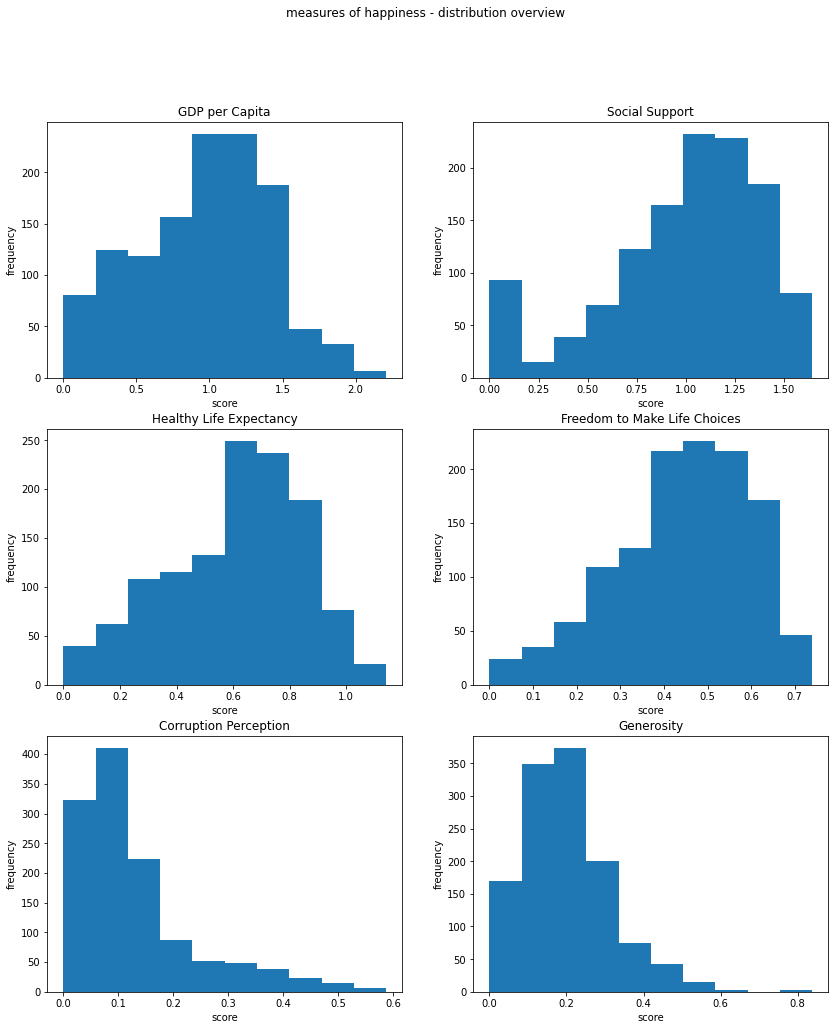

In [17]:
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6]) = plt.subplots(3,2, figsize=(14,16))
for ax, title in zip([ax1,ax2,ax3,ax4,ax5,ax6], ['GDP per Capita','Social Support','Healthy Life Expectancy','Freedom to Make Life Choices','Corruption Perception','Generosity']):
    ax.hist(df[title])
    ax.set_title(title)
    ax.set_xlabel('score')
    ax.set_ylabel('frequency')
fig.suptitle('measures of happiness - distribution overview')
plt.show()

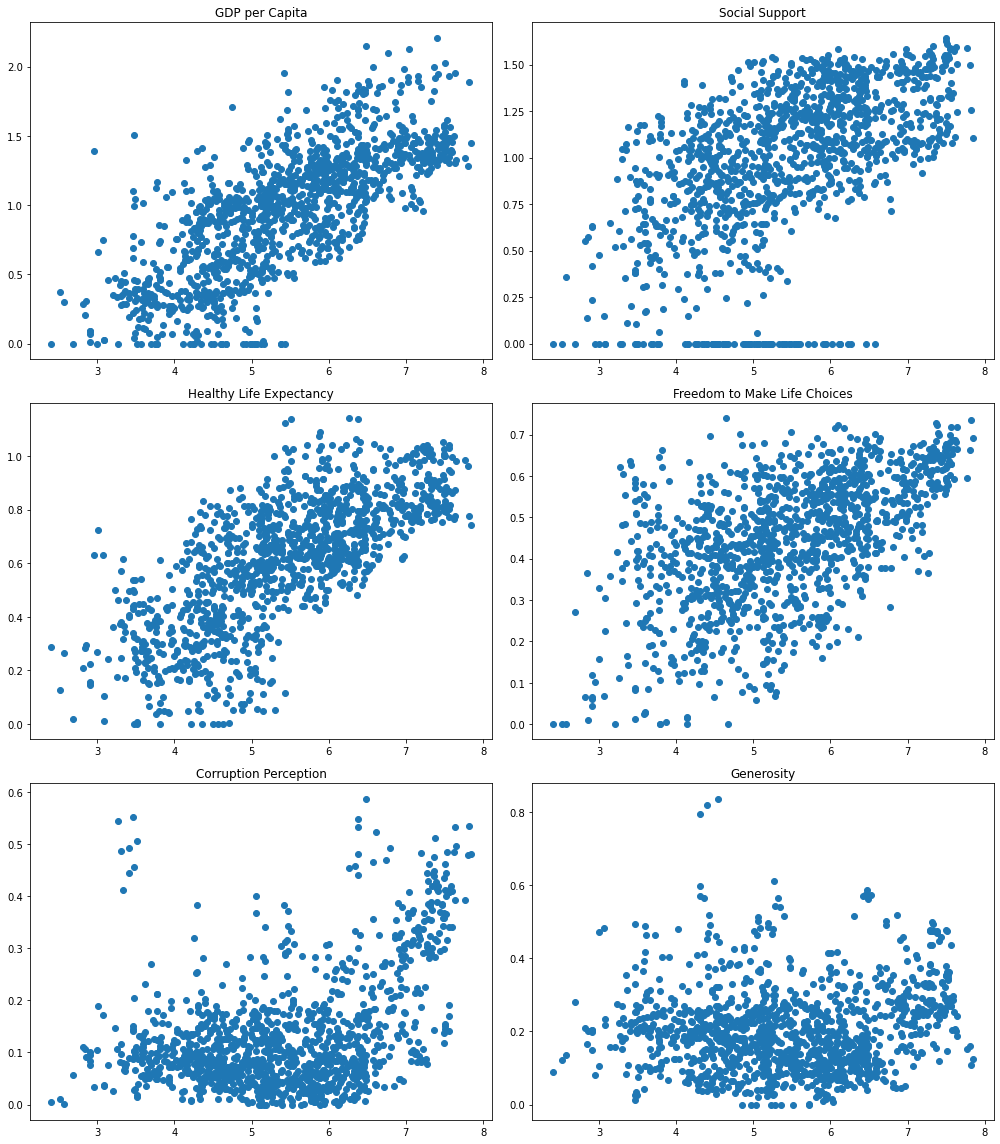

In [19]:
fig, ([ax1,ax2],[ax3,ax4],[ax5,ax6]) = plt.subplots(3,2, figsize=(14,16))
for ax, title in zip([ax1,ax2,ax3,ax4,ax5,ax6], ['GDP per Capita','Social Support','Healthy Life Expectancy','Freedom to Make Life Choices','Corruption Perception','Generosity']):
    ax.scatter(df['Happiness Score'],df[title])
    ax.set_title(title)
    #ax.set_xlabel('score')
    #ax.set_ylabel('frequency')
#fig.suptitle('measures of happiness - distribution overview')
fig.tight_layout()
plt.show()